# Introduction

The goal of this project is to understand the Quarterback rating metric in greater detail, specifically how various factors and data like plays, epa, pass plays, run plays, etc all affect the overall QBR rating when analyzing a quarterbacks preformance. This project is especially important to me because I grew up watching football with family and friends, and to this day, am still a huge fan. 

As such, I've heard the term "QBR" (otherwise known as quarterback rating) being passed around, and wanted to take a deeper dive into understanding not only the metric itself, but why it is considered the most important metric when evaluating a quarterback in the NFL. My hypothesis regarding the data was that ideally higher positive run plays, pass plays as well as overall plays that a quarterback makes in a given season will have a great affect on the overall QBR. My further assumption is that the more poisitve the data for a specific quarterback, the better the overall QBR will be.  

# Data Explained

A Link is provided: https://github.com/nflverse/nflverse-data/releases

To clean the data, several things needed to be done. 

1. I first printed out each  column and row of data using .describe in order to understand what each column meant, seeing if there were outliers or unwanted columns that I could get rid of. 


2. I then had to clean the columns. There were several columns that were not necessary such as: name_first, name_last, headshot, rank and team_abb. Most of these columns were redundent and served no actual purpose.


3. I removed those columns using .drop in order to filter out the data as much as possible.


4. I then began filtering the rows. I first went by the qb plays, noticing that generally, if the plays were under 10, the data usually wouldn't actually be relevant because the quarterback would then have a perfect rating or a rating of 0 which would skew the data. So I filtered those rows out by using ['qb_plays']>10]


5. Next I did the same for qbr rating, noticing that within the data, most of the data that had a sub 10 qbr came from quarterbacks who didn't actually play very much if at all, and as such, would skew the data.

In [47]:
import pandas as pd


def create_data_dictionary(qb):
    data_dict = []
    for column in qb.columns:
        data_type = str(qb[column].dtype)
        unique_values = qb[column].dropna().unique()
        missing_values = qb[column].isnull().sum()
        data_dict.append({
            'Column Names': column,
            'Data Type': data_type,
            'Unique Values': unique_values[:10], 
            'Missing Values': missing_values
        })
    return data_dict


chunk_size = 928 
reader = pd.read_csv('qbr-filtered.csv', chunksize=chunk_size)
data_dict = []


for chunk in reader:
    data_dict.extend(create_data_dictionary(chunk))


data_dict_df = pd.DataFrame(data_dict)


print(data_dict_df)

    Column Names Data Type                                      Unique Values  \
0     Unnamed: 0     int64                    [0, 1, 2, 3, 4, 6, 7, 8, 9, 10]   
1         season     int64  [2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...   
2    season_type    object                                [Regular, Playoffs]   
3      game_week    object                                     [Season Total]   
4      player_id     int64  [1428, 2330, 5529, 4459, 2580, 733, 2149, 5209...   
5      qbr_total   float64  [86.4, 71.9, 68.6, 83.0, 67.4, 67.1, 66.7, 68....   
6      pts_added   float64  [85.5, 9.4, 30.9, 12.8, 28.2, 29.9, 36.7, 3.1,...   
7       qb_plays     int64   [624, 174, 610, 135, 542, 623, 631, 92, 548, 35]   
8      epa_total   float64  [108.8, 18.6, 57.9, 19.9, 53.0, 58.3, 64.2, 7....   
9           pass   float64  [96.0, 15.9, 38.8, 16.9, 43.1, 43.2, 61.0, 6.2...   
10           run   float64  [6.8, -0.6, 4.3, 0.4, -0.9, -0.3, -5.2, -0.5, ...   
11      exp_sack     int64  

# Results

In [7]:
import pandas as pd

qb = pd.read_csv('qbr-filtered.csv')
qb

,Unnamed: 0,season,season_type,game_week,player_id,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,penalty,qbr_raw,sack,name_display,team,qualified,Playoffs
0,0,2006,Regular,Season Total,1428,86.4,85.5,624,108.8,96.0,6.8,0,1.1,87.4,-5.0,Peyton Manning,Colts,True,2
1,1,2006,Playoffs,Season Total,1428,71.9,9.4,174,18.6,15.9,-0.6,0,1.2,68.2,-2.1,Peyton Manning,Colts,True,2
2,2,2006,Regular,Season Total,2330,68.6,30.9,610,57.9,38.8,4.3,0,2.8,67.2,-12.0,Tom Brady,Patriots,True,2
3,3,2006,Playoffs,Season Total,2330,83.0,12.8,135,19.9,16.9,0.4,0,0.3,79.2,-2.2,Tom Brady,Patriots,True,2
4,4,2006,Regular,Season Total,5529,67.4,28.2,542,53.0,43.1,-0.9,0,0.3,67.6,-10.4,Philip Rivers,Chargers,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,1352,2023,Regular,Season Total,12477,68.9,1.8,47,5.5,3.9,0.0,0,1.6,63.6,-0.3,Brian Hoyer,Raiders,False,1
924,1355,2023,Regular,Season Total,3886812,60.2,4.5,314,28.8,21.0,5.4,0,2.4,55.1,-8.4,Jake Browning,Bengals,False,1
925,1356,2023,Regular,Season Total,2576980,60.0,0.4,34,1.5,0.6,0.9,0,0.0,53.9,-0.1,Marcus Mariota,Eagles,False,1
926,1357,2023,Regular,Season Total,4035671,56.6,0.5,54,3.9,3.0,1.1,0,-0.2,53.3,-1.4,Tyler Huntley,Ravens,False,1


Below I have created a correlation matrix that shows a heatmap of the different relationships between the various numeric data points against one another, showing which correlation is the strongest with certain variables. In this situation, we are foucsing primarily on seeing which variables correlate strongly with qbr_total, and which specific skill sets help attribute to a higher QBR. The matrix below tells us that there is a strong positive correlation between qbr_total and points added at 0.67, showing that points added by the quarterback is an important metric to consider when considering QBR. 

Additionally, we see that there is a positive correlation between qbr_total and pass as well as epa_total, with a slightly weaker positive correlation with sacks which all factor into QBR. What stood out to me is that there is actually a negative correlation between qb_plays and QBR, which was especially surprising to me given that I thought that qb_plays had an impact on quarterback rating. 

We also see that acorss the board, sacks have a negative correlation with each numerical dataset, which is unique to just sacks. As a result, an assumption can be made that sacks either only negatively correlate to the other variables, or sacks have to be measured against the quarterback as an independent statistic. However, we do see that there is an extremely strong correlation of qb_plays and epa_total.

<Axes: >

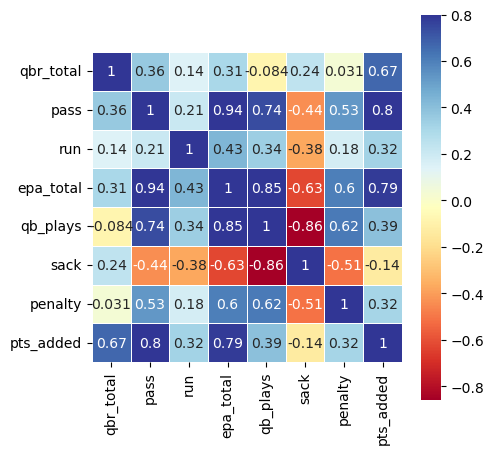

In [24]:
##Correlation Matrix with numerical Values
import seaborn as sns
import matplotlib.pyplot as plt



columns = ['qbr_total','pass','run','epa_total','qb_plays','sack','penalty','pts_added']
df_corr = qb[columns]

corrmat = df_corr.corr()
corrmat

# heatmap of correlation matrix
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, cmap = 'RdYlBu', linewidths = .5 )

Below I created a pairplot with numeric values using the playoff data versus the regular season data in order to visualize the difference in terms of how the regular season data impacted the playoff data. We can see in  pairplot chart that there is overlap, and more specifically as we can see in the top left pairplot that regular season games were overall higher, with overlap being present. As we take a look at each pairplot, we can see that overall, regular season games have a higher peak over playoff games. 


However, we can also see that in some categories, playoff data is higher than regular season data. For example, if we take a look at something like QBR_total versus EPA, splitting the two into both regular season and playoff games, we see that the trend seems to lean towards playoff games having overall higher and a more positive data trend. Sticking with QBR_total, which is the metric that we are the most focused on, we see that playoff QBR data is more positive when compared to qb plays and passing data, but seems to be more spread out when compared to seasonality and run data. Additionally, across the board the regular season (1) was relatively consistent compared to the playoff data (2) which was a lot more nebulous. 

/Users/nikhilgollapudi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


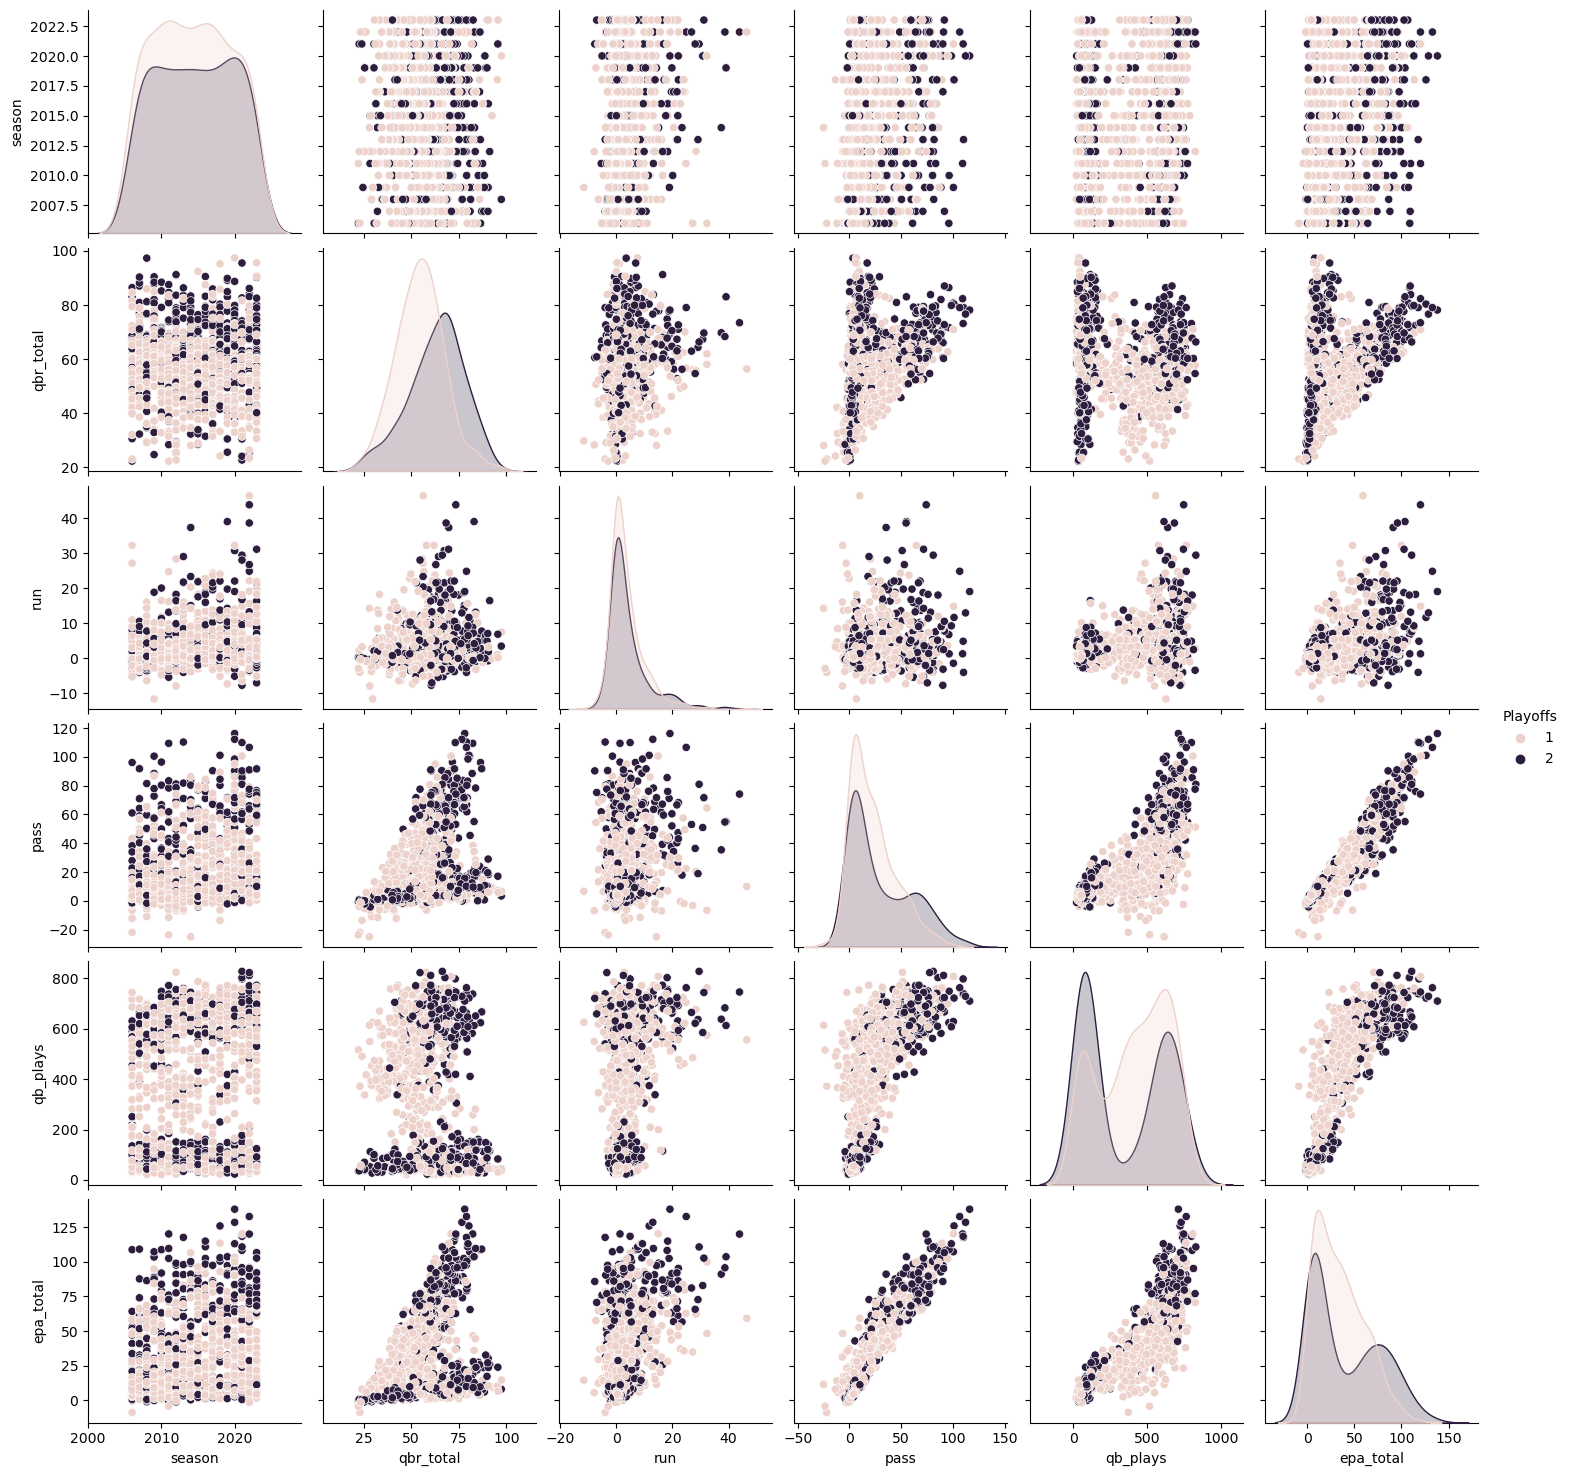

In [15]:
columns = ['Playoffs', 'season', 'season_type','qbr_total', 'run','pass', 'qb_plays','epa_total']
sns.pairplot(qb[columns], hue='Playoffs')

Below I have created a the mean of QBR_rating by year of regular games in order to better understand and visualize the mean value of 'qbr_total' for regular games over different years using a bar plot. We can see from the below data there was clear fluctuation between years, with 2009 having the highest average QBR and 2017 having the lowest. Over time overall, it looks like QBR average in relation to each year increased until 2009, then decreased until 2011, followed by a steady increase until 2015 where from there it stayed relatively consistent with slight fluctuations in off years. 


Additionally, what is interesting is that the qbr average from 2018 - 2020 was very much unchanged, which could be due to a variety of oustide factors (lack of good quarterback play, consistent quarterback play, not much spread across the board, etc ). Overall, the data is relatively consistent with slight dips here and there throughout the years for the regular season, meaning the variance during the regular season in relation to average QBR is a lot more minimal and most quarterback play across the board seems to be more consistent throughout each year. 

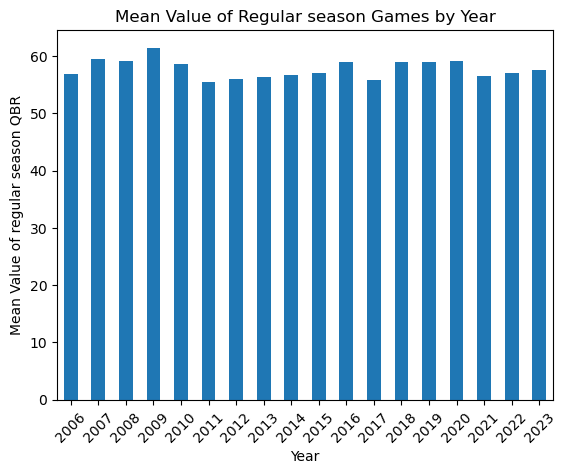

In [16]:

import pandas as pd
import matplotlib.pyplot as plt

data = qb

# Create DataFrame
df = pd.DataFrame(data)

# Filter the DataFrame to include only Regular games
regular_games_df = df[df['season_type'] == 'Regular']

# Group by Year and calculate mean
means_by_year = regular_games_df.groupby('season')['qbr_total'].mean()

# Plot means by Year
means_by_year.plot(kind='bar', xlabel='Year', ylabel='Mean Value of regular season QBR', title='Mean Value of Regular season Games by Year')
plt.xticks(rotation=45) 
plt.show()

Unlike the above regular season quarterback rating average, we can see below that for the playoff, there is a significant amount of variance between years for quarterback play in the playoffs. I found that there were several low points in terms of playoff preformances, specifically in around 2008, 2015 and 2021. I also found that there were several high points in playoff preformances, with 2009, 2013 and 2020 being the high points. 


When compared to the regular season, we see that 2009 was overall higher in the regular season as well, with 2013 and 2020 being relatively average in the regular season with higher qbr averages in the playoffs for those respective years comparitively. Overall, the data and graph below show that when discussing QBR in relation to the playoffs, the data has significant variance and significantly more unpredicatbility than the regular season.

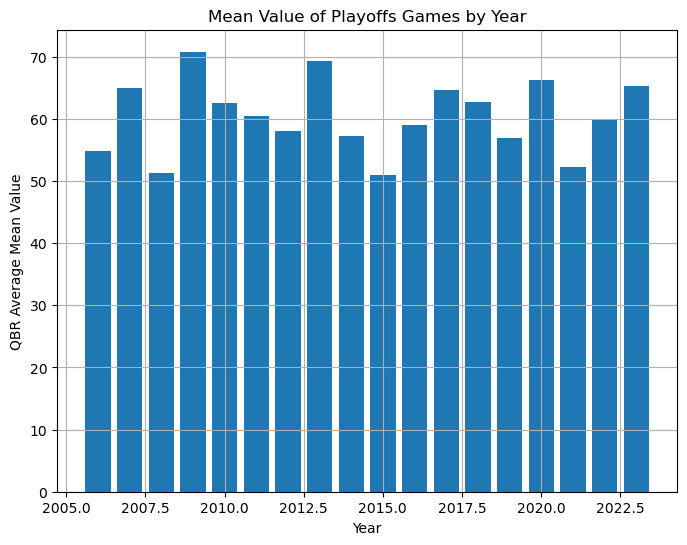

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


data = qb

# Create DataFrame
df = pd.DataFrame(data)

# Filter the DataFrame to include only Playoff games
playoffs_df = df[df['season_type'] == 'Playoffs']

# Group by Year and calculate mean
means_by_year = playoffs_df.groupby('season')['qbr_total'].mean()

# Plot means by Year using bar plot
plt.figure(figsize=(8, 6))
plt.bar(means_by_year.index, means_by_year.values)
plt.title('Mean Value of Playoffs Games by Year')
plt.xlabel('Year')
plt.ylabel('QBR Average Mean Value')
plt.grid(True)
plt.show()


Below is a line plot distribution of quarterback rating and the frequency at which the distribution is done. I wanted to take a look at the overall distribution of quarterback rating per year in order to better understand what the peak years for quarterback rating are. 

Additionally, by understanding which years have the highest QBR rating compared to others, it better helps understand the averages of QBR data of the regular season and playoffs in relation, which will help understand which years overall had the strongest QB plays versus others. 

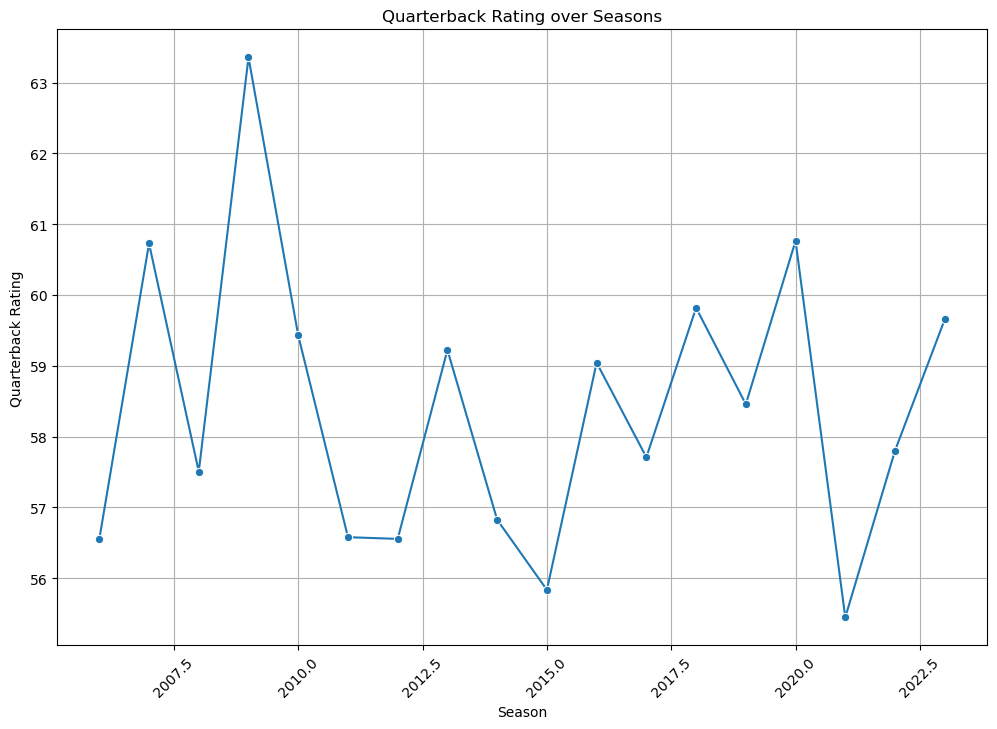

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=qb, x='season', y='qbr_total', marker='o', err_style=None)
plt.title('Quarterback Rating over Seasons')
plt.xlabel('Season')
plt.ylabel('Quarterback Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Summary

In [20]:
import pandas as pd

# Filter the DataFrame to include only regular season and playoff games
regular_season_df = qb[qb['season_type'] == 'Regular']
playoffs_df = qb[qb['season_type'] == 'Playoffs']

# Summary statistics for regular season
regular_season_summary = regular_season_df['qbr_total'].describe()

# Summary statistics for playoffs
playoffs_summary = playoffs_df['qbr_total'].describe()

print("Summary statistics for Quarterback Rating in Regular Season:")
print(regular_season_summary)

print("\nSummary statistics for Quarterback Rating in Playoffs:")
print(playoffs_summary)


Summary statistics for Quarterback Rating in Regular Season:
count    722.000000
mean      57.797368
std       12.897549
min       22.200000
25%       49.325000
50%       58.000000
75%       66.600000
max       97.400000
Name: qbr_total, dtype: float64

Summary statistics for Quarterback Rating in Playoffs:
count    206.000000
mean      60.487864
std       18.578280
min       22.200000
25%       45.950000
50%       62.300000
75%       74.675000
max       95.500000
Name: qbr_total, dtype: float64


From the calculations, data and graphs a bove, we can see that there is a stark difference between quarterback rating during the regular season and the playoffs. During the regular season, QBR seems to be consistent, with a mean of around 57.7, and the 25, 50 and 75 percent quartiles are 59, 58 and 66, all seemingly close to one another. As such, the IQR is 17, compared to the playoff distrbution which is 29, implying that the data for the qbr in the playoffs has a much larger distribution, likely due to outliers as well as a greater variability. 


The graphs above additionally show the difference in the average qbr between the regualr season and the playoffs, showing that during the regular season, there is clearly more consistency compared to the playoffs which have siginificantly more variability. Lastly, from the heat map shown above, we can see how qbr is primarily affected by pass, epa and points added. 

# Conclusion

To conlcude, qbr as a metric is an interesting one. I originally thought that qb_plays would be a primary indiciator for the qbr metric, but really its a mix of pass plays, epa and points added. Run plays are barely even aknowledged, and penalties are not as big of a factor as I thought they would be.

Qbr has high variance during the playoffs, but during the regular season, qbr is relatively consistent. There are significantly more outliers within the data focusing on the playoffs, which is likely why the playoff qbr data is so different from the regular season data. Amount of games played, level of play, and several metrics that are non quantitative are likely factors in the variance of the qbr during the playoffs versus the regualar season. 

In terms of next steps, the basic analyzation of qbr is conducted and the factors that are mainly impacting qbr are clear. However, there is still plenty to do. From here, what can be done is analyze traditional statistics such as completion %, Passing yards and interceptions as well as yards per attempt to better provide additional context. 


After that, analyzing game situations, accuracy, pocket presence as well as red zone effeciency and 3rd down attempts to understand situational football metrics to have a further grasp on how the quarterback rating plays into the situational and qualitative aspects of a quarterback. By analyzing these factors in conjunction with the QBR, you can gain a more comprehensive understanding of a quarterback's performance and effectiveness on the field.